In [1]:
# 1. IMPORT LIBRARIES

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, f1_score

from xgboost import XGBClassifier

In [2]:
# 2. LOAD DATA

df = pd.read_csv('train_COMPETITION_modified (1).csv')

In [3]:
# 3. BASIC EXPLORATION

print(df.head())
print(df.info())

      ID  duration protocol_type   service flag  src_bytes  dst_bytes  land  \
0   7060         0           tcp      smtp   SF       1129        327     0   
1  22036         0           tcp      http   SF        242       2147     0   
2  19555         0           tcp      http   SF        299       3991     0   
3  11393         0           udp  domain_u   SF         43        133     0   
4  22783         0           tcp    telnet   S0          0          0     0   

   wrong_fragment  urgent  ...  dst_host_same_srv_rate  \
0               0       0  ...                    1.00   
1               0       0  ...                    1.00   
2               0       0  ...                    1.00   
3               0       0  ...                    1.00   
4               0       0  ...                    0.14   

   dst_host_diff_srv_rate  dst_host_same_src_port_rate  \
0                    0.00                         0.14   
1                    0.00                         0.00   
2 

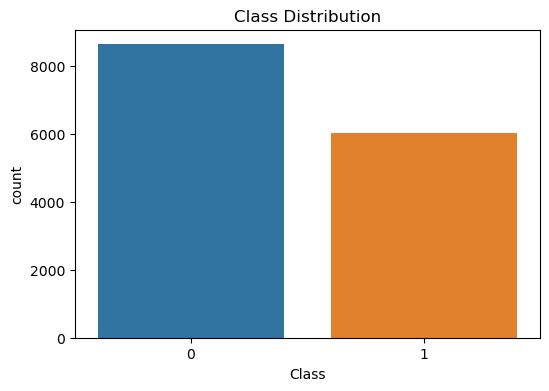

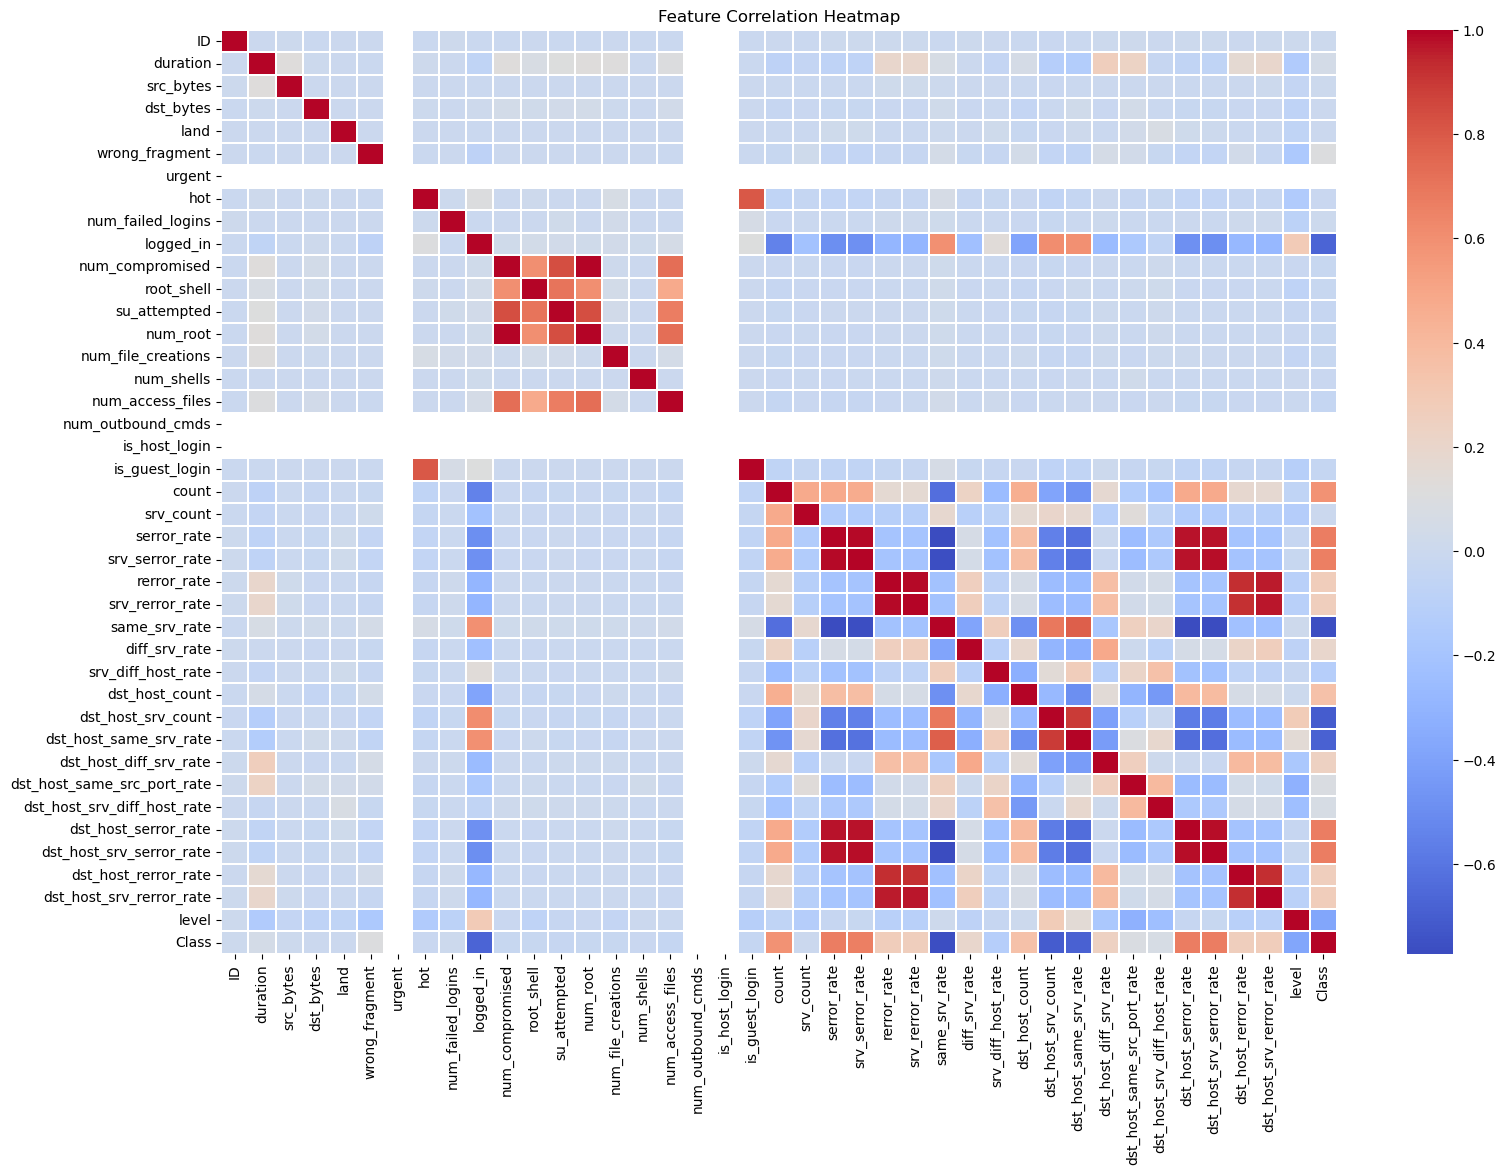

In [4]:
# 4. DATA VISUALIZATION

plt.figure(figsize=(6,4))
sns.countplot(x='Class', data=df)
plt.title('Class Distribution')
plt.show()

# Correlation heatmap (numerical only)
plt.figure(figsize=(18,12))
num_df = df.select_dtypes(include=np.number)
sns.heatmap(num_df.corr(), cmap='coolwarm', linewidths=0.1)
plt.title('Feature Correlation Heatmap')
plt.show()

In [5]:
# 5. PREPROCESSING

# Drop unnecessary columns
df.drop(['ID', 'level'], axis=1, inplace=True)

# Encode target
if df['Class'].dtype == 'object':
    df['Class'] = df['Class'].apply(lambda x: 0 if x == 'normal' else 1)

# One-Hot Encoding for categorical features
categorical_cols = ['protocol_type', 'service', 'flag']
df = pd.get_dummies(df, columns=categorical_cols)

# Split features & target
X = df.drop('Class', axis=1)
y = df['Class']

# Train/Test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [6]:
# 6. MODEL TRAINING

model = RandomForestClassifier(
    n_estimators=200,
    max_depth=None,
    random_state=42,
    n_jobs=-1
)

model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200, n_jobs=-1, random_state=42)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1729
           1       1.00      0.99      1.00      1208

    accuracy                           1.00      2937
   macro avg       1.00      1.00      1.00      2937
weighted avg       1.00      1.00      1.00      2937



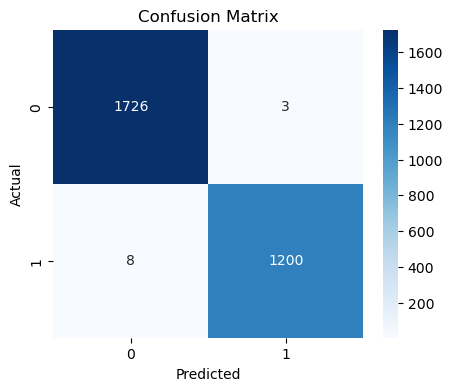

In [7]:
# 7. EVALUATION

y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()